In [1]:
#!pip install powerlaw
import re
from collections import Counter
import powerlaw
import matplotlib.pyplot as plt

# ======= Step 1: Carica e tokenizza =======
with open("merged_horror_stories_lowtemp.txt", "r", encoding="utf-8") as f:
    text = f.read().lower()

# Tokenizzazione molto semplice: solo parole con lettere
words = re.findall(r"\b[a-z]+\b", text)

# Frequenza delle parole
word_counts = Counter(words)
frequencies = list(word_counts.values())

print(word_counts)
print(sorted(frequencies, reverse = True))

Counter({'the': 38666, 'and': 15638, 'a': 13178, 'of': 12249, 'she': 11994, 'to': 11460, 'her': 9671, 'that': 8786, 'in': 7900, 'was': 7820, 'as': 6484, 'had': 6210, 'it': 5318, 'i': 4963, 'he': 4791, 'but': 4680, 'with': 4616, 'its': 3676, 'his': 3140, 'for': 2796, 'on': 2700, 'could': 2554, 'knew': 2233, 'my': 2176, 'darkness': 2161, 's': 2036, 'would': 1993, 'their': 1983, 'through': 1962, 'out': 1954, 'they': 1953, 't': 1891, 'from': 1825, 'into': 1821, 'eyes': 1739, 'there': 1619, 'heart': 1584, 'at': 1526, 'like': 1499, 'seemed': 1492, 'been': 1487, 'were': 1425, 'by': 1361, 'feel': 1347, 'be': 1310, 'town': 1306, 'eleanor': 1290, 'house': 1236, 'wind': 1234, 'couldn': 1173, 'back': 1152, 'shadows': 1124, 'not': 1095, 'him': 1092, 'figure': 1088, 'creature': 1084, 'sarah': 1063, 'never': 1062, 'me': 1049, 'over': 1019, 'down': 1013, 'you': 1006, 'around': 993, 'then': 971, 'room': 971, 'face': 959, 'night': 957, 'something': 953, 'dark': 949, 'door': 933, 'this': 910, 'hollow': 9

Calculating best minimal value for power law fit
α (alpha): 2.0067%
xmin: 183.0


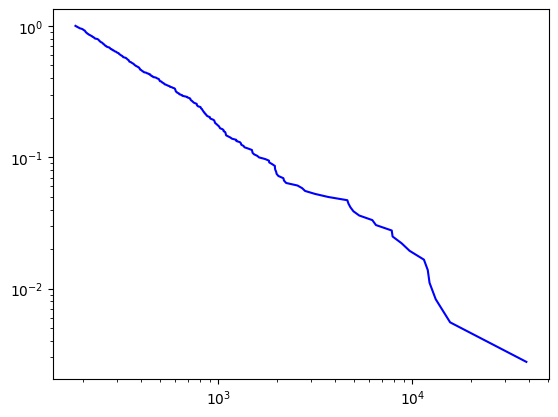

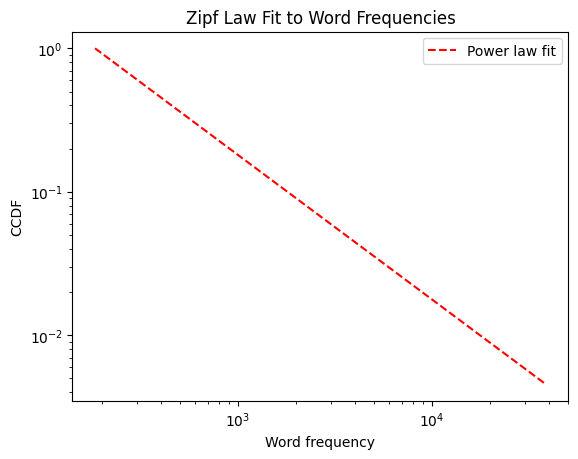

In [2]:
# ======= Step 2: Analisi con Powerlaw =======
results = powerlaw.Fit(frequencies, discrete=True)

# Stampa i parametri stimati
print(f"α (alpha): {results.alpha:.4f}")
print(f"xmin: {results.xmin}")

# ======= Step 3: Plot =======
fig = plt.figure()
results.plot_ccdf(color='b', label='Empirical')
results.power_law.plot_ccdf(color='r', linestyle='--', label='Power law fit')
plt.xlabel('Word frequency')
plt.ylabel('CCDF')
plt.title('Zipf Law Fit to Word Frequencies')
plt.legend()
plt.show()